# Ejercicio 2: Introducción a la probabilidad

## Parte 3.

Para las siguientes distribuciones, calcular 

**a)** la función de distribución acumulada,

**b)** la media y

**c)** la desviación estándar

Grafica ejemplos para distintos valores de $\mu$ y $\sigma$.

#### _Algunas definiciones_

La **función de distribución acumulada** de una variable aleatoria discreta $ X $ se define como

$$ F(x) = P\{ X \leq x \} = \sum_{k \leq x} p(k) $$

El **valor de expectación** o **media** de una variable aleatoria discreta $ X $ con función de probabilidad $ p(x) $ se define como

$$ E[X] = \sum_{x} xp(x) $$

Para una variable continua, se cambian las sumatorias por integrales y se integra sobre la _densidad de probabilidad_.

La **varianza** de una variable aleatoria con media $ \mu = E[X] $ tiene dos definiciones equivalentes:

$$ Var(X) = E[(X - \mu)^2] = E[X^2] - (E[X])^2 $$

La cantidad $ \sigma = \sqrt{Var(X)} $ se conoce como **desviación estándar**.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)

### Distribución uniforme

Se considera que una variable aleatoria continua $ X $ es uniforme en un intervalo $ (\alpha, \beta) $ si su densidad de probabilidad es

$$
f(x) = \left\{
        \begin{array}{ll}
            \frac{1}{\beta - \alpha} & \quad \alpha < x < \beta \\
            0 & \quad x \leq \alpha, x \geq \beta
        \end{array}
    \right.
$$

#### Función de distribución acumulada

Tenemos tres casos. Para $ x \leq \alpha $:

$$ F(x) = \int_{-\infty}^{x} f(x) dx = \int_{-\infty}^{x} 0 dx = 0 $$

Para $ \alpha < x < \beta $:

$$ F(x) = \int_{-\infty}^{x} f(x) dx = \int_{-\infty}^{\alpha} 0 dx + \int_{\alpha}^{x} \Big(\frac{1}{\beta - \alpha}\Big) dx = \frac{x - \alpha}{\beta - \alpha} $$

Para $ x \geq \beta $:

$$ F(x) = \int_{-\infty}^{x} f(x) dx = \int_{-\infty}^{\alpha} 0 dx + \int_{\alpha}^{\beta} \Big(\frac{1}{\beta - \alpha}\Big) dx + \int_{\beta}^{x} 0 dx  = \frac{\beta - \alpha}{\beta - \alpha} = 1 $$

Por lo tanto,

$$
F(x) = \left\{
        \begin{array}{ll}
            0 & \quad x \leq \alpha \\
            \frac{x - \alpha}{\beta - \alpha} & \quad \alpha < x < \beta \\
            1 & \quad x \geq \beta
        \end{array}
    \right.
$$

#### Valor de expectación (media)

$$
\begin{align*}
    E[X] &= \int_{-\infty}^{\infty} xf(x) dx \\
         &= \int_{\alpha}^{\beta} \frac{x}{\beta - \alpha} dx \\
         &= \frac{\beta^2 - \alpha^2}{2(\beta - \alpha)} \\
         &= \frac{\beta + \alpha}{2}
\end{align*}
$$

#### Desviación estándar

\begin{equation}
E[X^2] = \int_{-\infty}^{\infty} x^2f(x) dx = \int_{\alpha}^{\beta} \frac{x}{\beta - \alpha} dx = \frac{\beta^3 - \alpha^3}{2(\beta - \alpha)} = \frac{\beta^2 + \alpha \beta + \alpha^2}{3}
\end{equation}

\begin{equation}
\Rightarrow Var(X) = \frac{\beta^2 + \alpha \beta + \alpha^2}{3} - \frac{(\beta + \alpha)^2}{4} = \frac{(\beta - \alpha)^2}{12}
\end{equation}

$$ \Rightarrow \sigma = \frac{\beta - \alpha}{\sqrt{12}} $$

#### Ejemplos

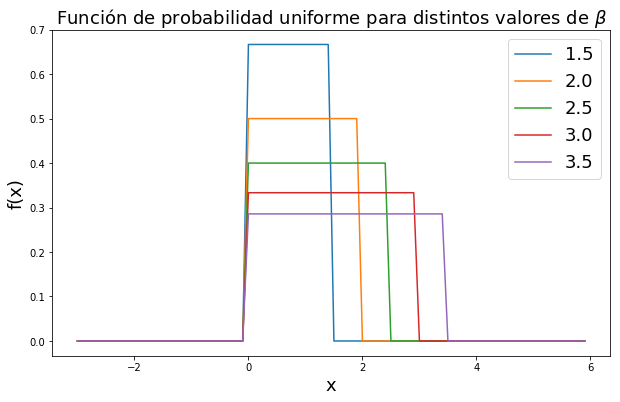

In [44]:
x = [i for i in np.arange(-3, 6, 0.1)]

def fx_uniform(x, alfa, beta):
    if x > alfa and x < beta:
        return (1.0 / (beta - alfa))
    else:
        return 0.0

vecfun = np.vectorize(fx_uniform)

alfa = 0.0
beta = 1.0

for i in range(5):
    beta += 0.5
    plt.plot(x, vecfun(x, alfa, beta), label = str(beta))
    
plt.xlabel('x', fontsize = 18)
plt.ylabel('f(x)', fontsize = 18)
plt.title(r'Función de probabilidad uniforme para distintos valores de $\beta$', fontsize = 18)
plt.legend(fontsize = 18)

### Distribución gaussiana

La densidad de probabilidad de una variable aleatoria normal o gaussiana con parámetros $ \mu $ y $ \sigma^2 $ es

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(x - \mu)^2/2\sigma^2} 
$$

Muchos fenómenos aleatorios obedecen, por lo menos aproximadamente, una distribución de probabilidad normal. El teorema del límite central es la base sobre la que se fundamenta esta observación.

#### Función de distribución acumulada

Tomemos la función de distribución de la variable aleatoria _estándar_ $ Z = (X - \mu)/\sigma $

$$ \Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-y^2/2} dy $$

que cumple $ \Phi(-x) = 1 - \Phi(x) \Rightarrow P\{Z \leq -x\} = P\{Z > x\} $ y cuyos valores pueden tabularse. De aquí se sigue que la función de distribución para X puede expresarse como

$$ F(a) = P\{X \leq a\} = P\Big( \frac{X - \mu}{\sigma} \leq \frac{a - \mu}{\sigma} \Big) = \Phi \Big( \frac{a - \mu}{\sigma} \Big) $$

#### Valor de expectación (media)

Puede demostrarse que $ E[X] = \mu $. Primero, encontremos la media de la variable aleatoria _estándar_:

$$
\begin{align*}
    E[Z] &= \int_{-\infty}^{\infty} xf_z(x) dx \\
         &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} xe^{-x^2/2} dx \\
         &= -\frac{1}{\sqrt{2\pi}} e^{-x^2/2} |_{-\infty}^{\infty} \\
         &= 0
\end{align*}
$$

Como $ X = \mu + \sigma Z $, por linealidad de $ E $:

$$ E[X] = \mu + \sigma E[Z] = \mu $$

#### Desviación estándar

De forma parecida, puede demostrarse que la desviación estándar es igual a $ \mu $.

$$
\begin{align*}
    Var(Z) &= E[Z^2] \\
           &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} xe^{-x^2/2} dx \\
           &= \frac{1}{\sqrt{2\pi}} \Big( -xe^{-x^2/2} |_{-\infty}^{\infty} + \int_{-\infty}^{\infty} e^{-x^2/2} dx \Big) \\
           &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-x^2/2} dx \\
           &= 1
\end{align*}           
$$

Por linealidad de $ Var $:

$$ Var(X) = \sigma^2Var[Z] = \sigma^2 $$

Por lo que la desviación estándar es $ \sigma $.

#### Ejemplos

### Distribución binomial

Supongamos un experimento cuyos resultados pueden ser clasificados como *éxitos* o *fracasos*. Supongamos ahora que hacemos $ n $ ensayos de ese experimento, cada uno de los cuales termina en éxito con probabilidad $ p $ o en fracaso con probabilidad $ 1 - p $. Si $ X $ representa el número de éxitos en los $ n $ ensayos, entonces decimos que $ X $ es una _variable aleatoria binomial_ con parámetros $ (n, p) $. Su **función de probabilidad** sería

$$ P\{X = i\} = p(i) = {n\choose i} p^i (1 - p)^{n - i} $$

$$ i = 0, 1, ..., n $$

#### Función de distribución acumulada

Utilizamos la siguiente propiedad de la distribución binomial, que deriva directamente de su función de probabilidad:

$$ P\{X = k + 1\} = \frac{p(n - k)}{(1 - p)(k + 1)}P\{X = k\} $$

para calcular recursivamente

$$ P\{X \leq i\} = \sum_{k = 0}^i {n\choose k}p^k(1 - p)^{n - k} $$

#### Valor de expectación (media)

Aplicando la definición:

$$
\begin{align*}
    E[X^k] &= \sum^{n}_{i = 0} i^k {n\choose i} p^i(1 - p)^{n - i} \\
           &= \sum^{n}_{i = 1} i^k {n\choose i} p^i(1 - p)^{n - i}
\end{align*}
$$

donde elevamos $ X^k $ solo porque nos va a servir para calcular la varianza. Usar la identidad

$$ i{n\choose i} = n{{n - 1}\choose {i - 1}} $$

nos da

$$ E[X^k] = np\sum^{n}_{i = 1} i^{k - 1} {{n - 1}\choose {i - 1}} p^{i - 1}(1 - p)^{n - i} $$

Cambiando el índice mudo $ i = j + 1 $:

$$
\begin{align*}
E[X^k] &= np\sum^{n}_{j = 0} (j + 1)^{k - 1} {{n - 1}\choose j} p^j(1 - p)^{n - 1 - j} \\
       &= npE[(Y + 1)^{k - 1}] 
\end{align*} 
$$

donde $ Y $ es una variable aleatoria binomial con parámetros $ (n - 1, p) $. Si elegimos k = 1 en la ecuación anterior, obtenemos finalmente el **valor de expectación**:

$$ E[X] = np $$

#### Desviación estándar

Si elegimos k = 2 en la ecuación para el valor de expectación, obtenemos

$$ E[X^2] = npE[Y + 1] = np[(n - 1)p + 1] $$

Aplicando la definición de varianza:

\begin{equation}
Var(X) = E[X^2] - (E[X])^2 = np[(n - 1)p + 1] - (np)^2 = np(1 - p)
\end{equation}

$$ \Rightarrow \sigma = \sqrt{np(1 - p)} $$

#### Ejemplos

### Distribución de Poisson

Se dice que una variable aleatoria $ X $ que toma valores enteros no negativos es _de Poisson_ si tiene la función de probabilidad

$$ P\{X = i\} = p(i) = e^{-\lambda} \frac{\lambda^i}{i!} $$

la cual es una aproximación de la función de probabilidad binomial cuando $ n $ es muy grande, $ p $ es pequeño y $ \lambda = np $ es de tamaño _moderado_. $ \lambda $ suele estimarse de manera empírica.

#### Función de distribución acumulada

Utilizamos la siguiente propiedad de la distribución de Poisson, que deriva directamente de su función de probabilidad:

$$ P\{X = k + 1\} = \frac{\lambda}{(k + 1)}P\{X = k\} $$

para calcular recursivamente

$$ P\{X \leq i\} = \sum_{k = 0}^i e^{-\lambda} \frac{\lambda^k}{k!} $$

#### Valor de expectación (media)

Aplicando la definición:

$$ E[X] = \sum_{i = 0}^{\infty} \frac{ie^{-\lambda}\lambda^i}{i!} = \lambda \sum_{i = 1}^{\infty} \frac{e^{-\lambda}\lambda^{i - 1}}{(i - 1)!} $$

Cambiando el índice mudo i = j + 1:

\begin{equation}
E[X] = \lambda e^{-\lambda} \sum_{j = 0}^{\infty} \frac{\lambda^j}{j!} = \lambda e^{-\lambda}(e^\lambda)
\end{equation}

$$ \Rightarrow E[X] = \lambda $$

Este resultado coincide con el de la distribución binomial si consideramos $ \lambda = np $.

#### Desviación estándar

Primero calculamos $ E[X^2] $:

$$ E[X^2] = \sum_{i = 0}^{\infty} \frac{i^2e^{-\lambda}\lambda^i}{i!} = \lambda \sum_{i = 1}^{\infty} \frac{ie^{-\lambda}\lambda^{i - 1}}{(i - 1)!} $$

Cambiando el índice mudo i = j + 1:

\begin{equation}
E[X^2] = \lambda \sum_{j = 0}^{\infty} \frac{(j + 1)e^{-\lambda} \lambda^j}{j!} = \lambda \Big[ \sum_{j = 0}^{\infty} \frac{je^{-\lambda} \lambda^j}{j!} + \sum_{j = 0}^{\infty} \frac{e^{-\lambda} \lambda^j}{j!} \Big]
\end{equation}

$$ \Rightarrow E[X^2] = \lambda(\lambda + 1) $$

Así, encontramos que $ Var(X) = \lambda(\lambda + 1) - \lambda^2 = \lambda $

$$ \Rightarrow \sigma = \sqrt{\lambda} $$

#### Ejemplos

### Distribución beta

La densidad de probabilidad de una distribución beta es

$$
f(x) = \left\{
        \begin{array}{ll}
            \frac{1}{B(a, b)} x^{a - 1} (1 - x)^{b - 1} & \quad 0 < x < 1 \\
            0 & \quad x \leq 0, x \geq 1
        \end{array}
    \right.
$$

donde

$$ B(a, b) = \int_{0}^{1} x^{a - 1} (1 - x)^{b - 1} dx = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)} $$

es la _función beta_.

Cuando $ a = b $ la densidad es simétrica. Si no es el caso, se sesga hacia la izquierda cuando $ b > a $ y a la derecha si $ a > b $.

Esta distribución puede utilizarse para modelar algún fenómeno aleatorio que puede tomar valores dentro de un intervalo finito $ [c, d] $ que puede tranformarse a $ [0, 1] $ mediante un cambio de variable.

**Nota:** La función gamma se define como

$$ \Gamma(\alpha) = \int_{0}^{\infty} e^{-y}y^{\alpha - 1} dy $$

y cumple la propiedad

$$ \Gamma(\alpha) = (\alpha -1)\Gamma(\alpha - 1) $$

#### Función de distribución acumulada

$$
\begin{align*}
    F[k] &= \int_{-\infty}^{k} f(x) dx = \int_{0}^{k} \frac{x^a (1 - x)^{b - 1}}{B(a, b)} dx \\
         &= \frac{B(k; a, b)}{B(a, b)} = I_k(a, b)
\end{align*}
$$

donde $ B(k; a, b) $ es la _función beta incompleta_ e $ I_k(a, b) $ es la _función beta regularizada_.

#### Valor de expectación

$$
\begin{align*}
    E[X] &= \int_{-\infty}^{\infty} xf(x) dx = \int_{0}^{1} \frac{x^a (1 - x)^{b - 1}}{B(a, b)} dx \\
         &= \frac{1}{B(a, b)} B(a + 1, b) \\
         &= \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a + 1)\Gamma(b)}{\Gamma(a + b + 1)} \\
         &= \frac{\Gamma(a + b)a\Gamma(a)}{\Gamma(a)(a + b)\Gamma(a + b)} \\
         &= \frac{a}{a + b}
\end{align*}
$$

#### Desviación estándar

\begin{align*}
    E[X^2] &= \int_{-\infty}^{\infty} x^2f(x) dx = \int_{0}^{1} \frac{x^{a + 1} (1 - x)^{b - 1}}{B(a, b)} dx \\
         &= \frac{1}{B(a, b)} B(a + 2, b) \\
         &= \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a + 2)\Gamma(b)}{\Gamma(a + b + 2)} \\
         &= \frac{\Gamma(a + b)a(a + 1)\Gamma(a)}{\Gamma(a)(a + b)(a + b + 1)\Gamma(a + b)} \\
         &= \frac{a(a + 1)}{(a + b)(a + b + 1)}
\end{align*}

\begin{align*}
    \Rightarrow Var[X] &= \frac{a(a + 1)}{(a + b)(a + b + 1)} - \Big( \frac{a}{a + b} \Big)^2 \\
                       &= \frac{ab}{(a + b)^2(a + b + 1)}
\end{align*}

$$
\Rightarrow \sigma = \frac{1}{a + b} \sqrt{\frac{ab}{a + b + 1}}
$$

#### Ejemplos

### Distribución $\chi^2$

La densidad de probabilidad de una distribución $\chi^2$ o de Pearson es

$$
f(x; k) = \left\{
        \begin{array}{ll}
            \frac{1}{2^{k/2}\Gamma(k/2)} x^{(k/2) - 1} e^{-x/2} & \quad x > 0 \\
            0 & \quad x \leq 0
        \end{array}
    \right.
$$

Esta distribución se utiliza en la llamada _prueba $ \chi^2 $_, utilizada como prueba de independencia y de bondad de ajuste y en la estimación de varianzas. Las distribución también se utiliza en el problema de estimar la media de una población normalmente distribuida.

#### Función de distribución acumulada

$$
\begin{align*}
    F[a] &= \int_{-\infty}^{a} f(x) dx = \int_{0}^{a} \frac{x^{(k/2) - 1} e^{-x/2}}{2^{k/2}\Gamma(k/2)} dx \\
         &= \frac{\gamma(k/2, a/2)}{\Gamma(k/2)}
\end{align*}
$$

donde $ \gamma(p, q) $ es la _función gamma incompleta_.

#### Valor de expectación

$$
\begin{align*}
    E[X] &= \int_{-\infty}^{\infty} xf(x) dx = \int_{0}^{\infty} \frac{x^{(k/2)} e^{-x/2}}{2^{k/2}\Gamma(k/2)} dx \\
         &= \frac{2\Gamma(k/2 + 1)}{\Gamma(k/2)} \\
         &= \frac{2(k/2)\Gamma(k/2)}{\Gamma(k/2)} \\
         &= k
\end{align*}
$$

#### Desviación estándar

\begin{align*}
    E[X^2] &= \int_{-\infty}^{\infty} x^2f(x) dx = \int_{0}^{\infty} \frac{x^{(k/2) + 1} e^{-x/2}}{2^{k/2}\Gamma(k/2)} dx \\
         &= \frac{2\Gamma(k/2 + 2)}{\Gamma(k/2)} \\
         &= \frac{2(k/2 + 1)(k/2)\Gamma(k/2)}{\Gamma(k/2)} \\
         &= k(k/2 +1)
\end{align*}

\begin{align*}
    \Rightarrow Var[X] &= k(k/2 + 1) - k^2 \\
                       &= k^2/2 + k - k^2 \\
                       &= k - k^2/2
\end{align*}

$$
\Rightarrow \sigma = 2k
$$